<a href="https://colab.research.google.com/github/Prog19/time_series_forecast/blob/master/tsf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Forecast

In [ ]:
!pip install auto-ts # AutoViML/Auto_TS
!pip install pyyaml==5.4.1
#!python -m pip install "dask[complete]" # restart runtime after install
import pandas as pd
import matplotlib.pyplot as plt
import re
from auto_ts import auto_timeseries
from datetime import timedelta
from IPython.display import clear_output
clear_output()

In [ ]:
def ts_model(data_file,xcol='Date',ycol='Close'):
    df = pd.DataFrame()
    df = pd.read_csv(data_file, usecols=[xcol,ycol])
    df[xcol] = pd.to_datetime(df[xcol])
    df = df.sort_values(xcol)
    df = df[df[xcol]>'01-01-2017'] # filter inserted after observing said plot
    df[ycol] = df[ycol].apply(lambda x: float(re.sub('[$,]','',x)))

    test_size_percent = 0.2
    train_size = int((1-test_size_percent)*df.shape[0])
    train_df = df.iloc[:train_size]
    test_df = df.iloc[train_size:]

    model = None
    model = auto_timeseries( forecast_period=90, score_type='rmse', time_interval='D', model_type='best')# refer to details on input parameters at https://github.com/AutoViML/Auto_TS
    model.fit(traindata=train_df, ts_column=xcol, target=ycol)
    model.get_leaderboard()
    model.plot_cv_scores()

    fore = model.predict(testdata=90)['yhat']

    start_forecast_date = test_df.iloc[-1][xcol].strftime("%d/%m/%Y")
    end_forecast_date = (test_df.iloc[-1][xcol] + timedelta(days=90-1)).strftime("%d/%m/%Y")
    fore_date = pd.date_range(start=start_forecast_date, end=end_forecast_date).to_frame().reset_index(drop=True)
    fore_df = pd.concat([fore_date, fore.to_frame().reset_index(drop=True)], axis=1, keys=[xcol,ycol])
    print(fore_df)
    
    return train_df, test_df, xcol, ycol, model, fore_df


## Example #1: Amazon Stock Price

Start of Fit.....
    Target variable given as = Close
Start of loading of data.....
    Inputs: ts_column = Date, sep = ,, target = ['Close']
    Using given input: pandas dataframe...
    Date column exists in given train data...
    train data shape = (1103, 1)
Alert: Could not detect strf_time_format of Date. Provide strf_time format during "setup" for better results.

Running Augmented Dickey-Fuller test with paramters:
    maxlag: 31 regression: c autolag: BIC
Data is stationary after one differencing
There is 1 differencing needed in this datasets for VAR model
No time series plot since verbose = 0. Continuing
Time Interval is given as D
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...
  Starting Prophet Fit
      No seasonality assumed since seasonality flag is set to False
  Starting Prophet Cross Validation
Max. iterations using expanding window cross validation = 5

Fold Number: 1 --> Trai

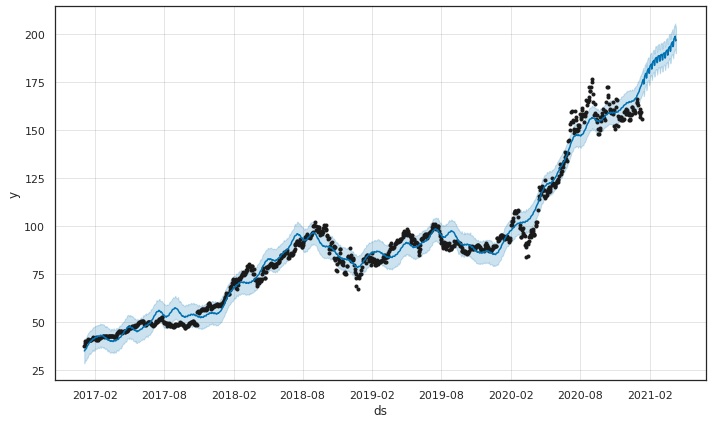

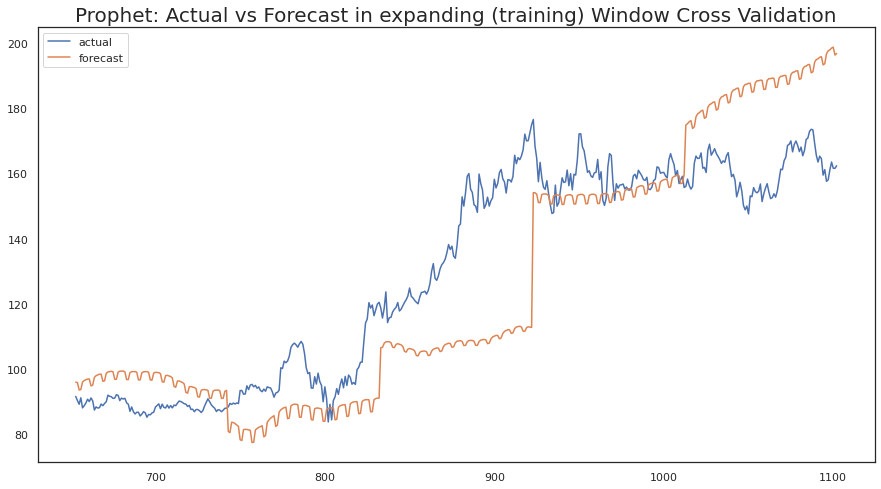

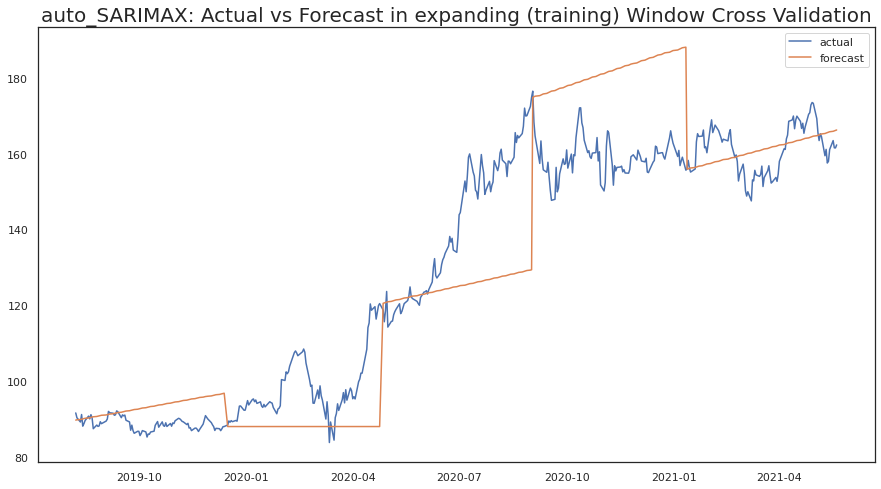

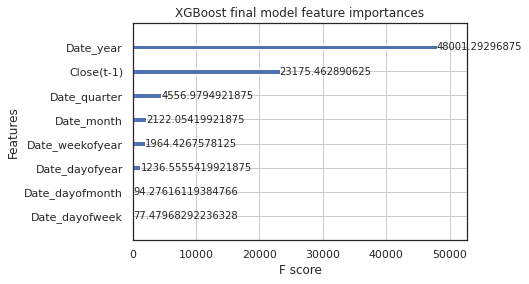

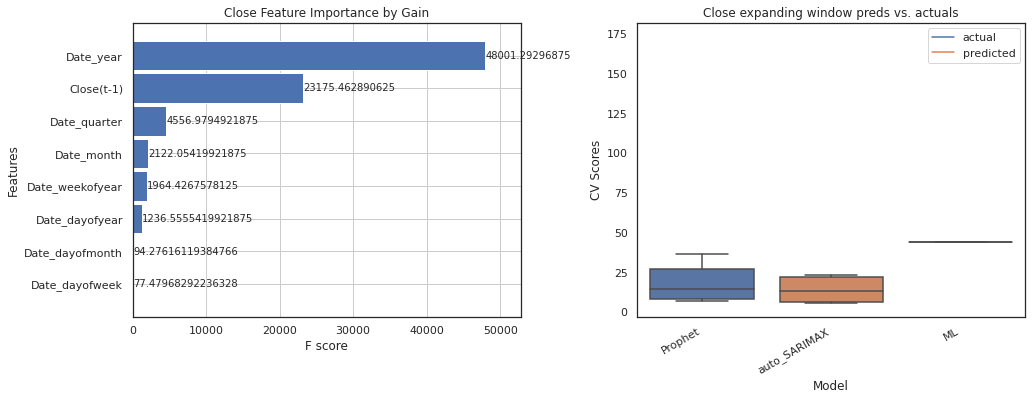

In [ ]:
train_df, test_df, xcol, ycol, model, fore_df = ts_model("/content/drive/MyDrive/Colab Notebooks/TSF/data/Amazon_Stock_Price - 6-27-2012 to 6-24-2022.csv")

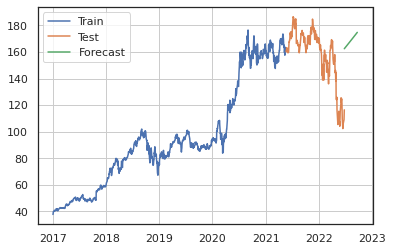

In [ ]:
plt.plot(figsize=(15,8))
plt.plot(train_df[xcol],train_df[ycol],label='Train')
plt.plot(test_df[xcol],test_df[ycol],label='Test')
plt.plot(fore_df[xcol],fore_df[ycol],label='Forecast')
plt.legend()
plt.grid()
plt.show()
# plotting this at the end of ts_model() disrupts plots

## Example #2 : Bitcoin Price

Start of Fit.....
    Target variable given as = Price
Start of loading of data.....
    Inputs: ts_column = Date, sep = ,, target = ['Price']
    Using given input: pandas dataframe...
    Date column exists in given train data...
    train data shape = (1602, 1)
Alert: Could not detect strf_time_format of Date. Provide strf_time format during "setup" for better results.

Running Augmented Dickey-Fuller test with paramters:
    maxlag: 31 regression: c autolag: BIC
Data is stationary after one differencing
There is 1 differencing needed in this datasets for VAR model
No time series plot since verbose = 0. Continuing
Time Interval is given as D
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...
  Starting Prophet Fit
      No seasonality assumed since seasonality flag is set to False
  Starting Prophet Cross Validation
Max. iterations using expanding window cross validation = 5

Fold Number: 1 --> Trai

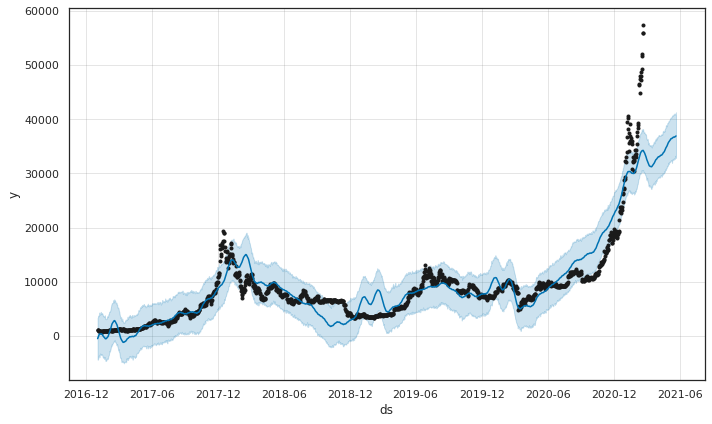

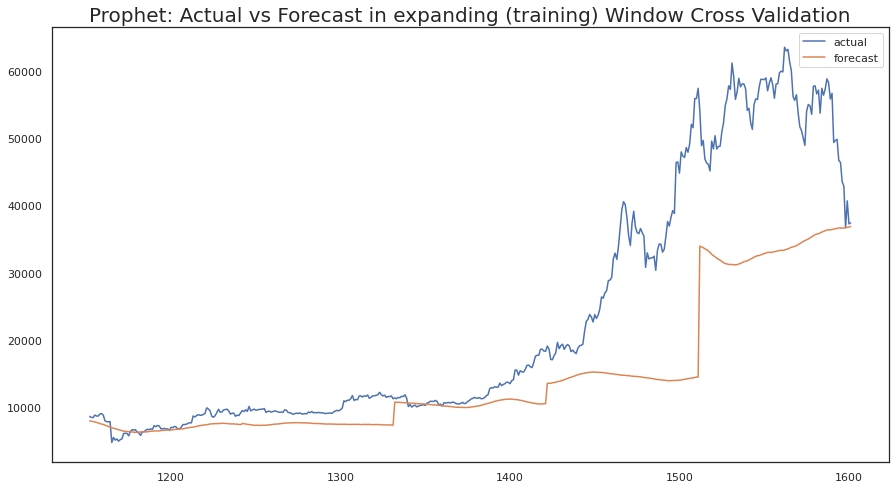

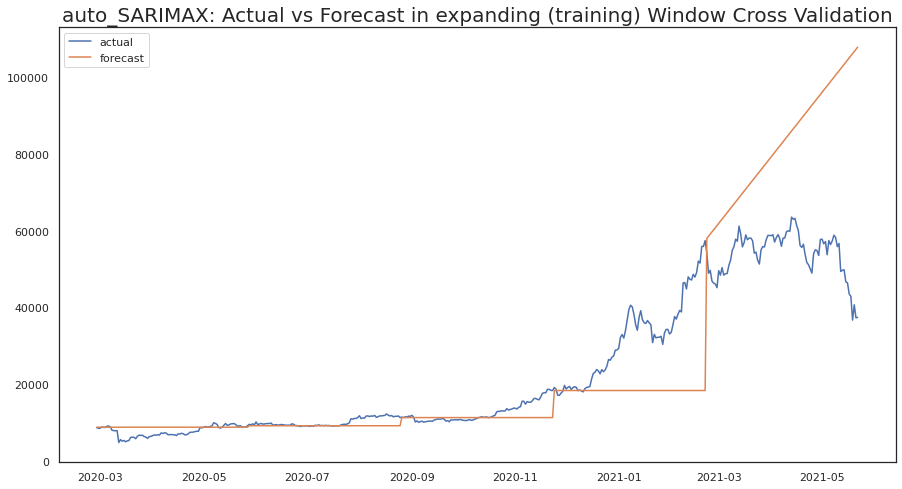

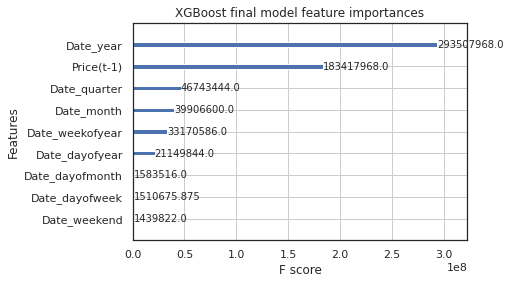

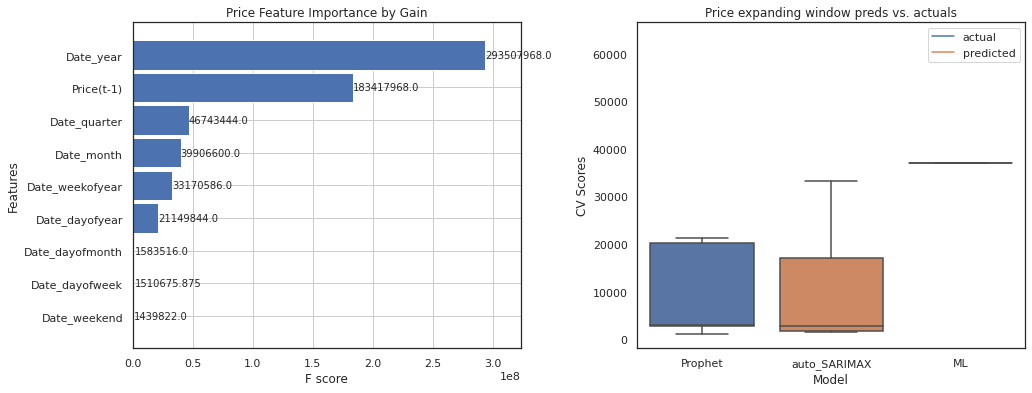

In [ ]:
train_df, test_df, xcol, ycol, model, fore_df = ts_model("/content/drive/MyDrive/Colab Notebooks/TSF/data/Bitcoin_Price - 5-27-2012 to 6-27-2022.csv",ycol='Price')

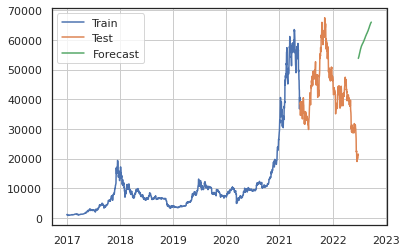

In [ ]:
plt.plot(figsize=(15,8))
plt.plot(train_df[xcol],train_df[ycol],label='Train')
plt.plot(test_df[xcol],test_df[ycol],label='Test')
plt.plot(fore_df[xcol],fore_df[ycol],label='Forecast')
plt.legend()
plt.grid()
plt.show()
# plotting this at the end of ts_model() disrupts plots